### About

1. First, dive in and explore the data set. Include your code and visuals from this process in your final write up. While doing this, look for something that provokes a question; specifically one that can be answered with an experiment.


2. The main component of this capstone is a research proposal. Using the data set you selected, propose and outline an experiment plan. The plan should consist of three key components:

    2-1. Analysis that highlights your experimental hypothesis.
    
    2-2. A rollout plan showing how you would implement and rollout the experiment
   
    2-3. An evaluation plan showing what constitutes success in this experiment

### 1. First, dive in and explore the data set. Include your code and visuals from this process in your final write up. While doing this, look for something that provokes a question; specifically one that can be answered with an experiment.

In this project, I will use the dataset originally published by "The Ramen Rater", and released on Kaggle. The Ramen Rater is a product review website for the hardcore ramen enthusiast (or "ramenphile"), with over 2500 reviews to date. It contains a review id, brand, variety(the product name), style(cup, bowl, or tray?), country, and stars. Stars indicate the ramen quality assessed by the reviewer on 5 point scale. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ramens = pd.read_csv('ramen-ratings.csv')
ramens.head(5)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


__Scenario overview__

A Japanese ramen company, Nissin is planning to sell new ramen in the US market. To develop successful ramen, they want to know what flavor is popular in the US market (spicy or non-spicy), and also they want to know how their spicy ramen is doing so far. 

In [3]:
ramens["Country"].replace("United States", "USA", inplace=True)

In [4]:
stars=(ramens[ramens['Stars'] != 'Unrated'])
stars["Stars"]=stars["Stars"].astype(float)

/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
stars['Spicy'] = np.where(stars['Variety'].str.contains('spicy|chili|hot|kimchi', case=False), "Spicy", "Non-spicy")
stars['Spicy'].value_counts()

/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Non-spicy    2180
Spicy         397
Name: Spicy, dtype: int64

Text(0.5, 1.0, 'Spicy Ramens Stars (made in US)')

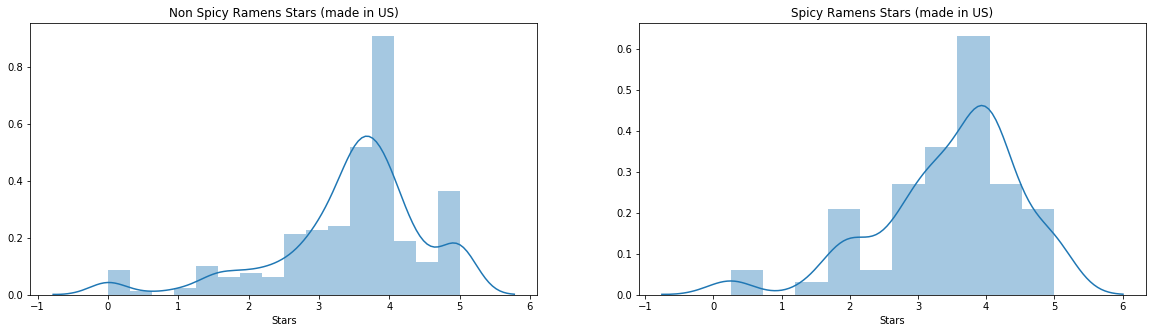

In [6]:
us_spicy_ramens=stars[(stars["Spicy"] == "Spicy")&(stars["Country"] == "USA")]
us_non_spicy_ramens=stars[(stars["Spicy"]=="Non-spicy")&(stars["Country"] == "USA")]

f, ax = plt.subplots(1, 2, figsize=(20, 5))


sns.distplot(us_non_spicy_ramens["Stars"], ax=ax[0]).set_title("Non Spicy Ramens Stars (made in US)")
sns.distplot(us_spicy_ramens["Stars"], ax=ax[1]).set_title("Spicy Ramens Stars (made in US)")


In [7]:
us_stars = stars[stars["Country"] == "USA"]
us_stars.groupby(['Spicy'])["Stars"].describe()

,count,mean,std,min,25%,50%,75%,max
Spicy,,,,,,,,
Non-spicy,254.0,3.452264,1.062055,0.00,3.0,3.50,4.0,5.0
Spicy,70.0,3.478571,1.032745,0.25,3.0,3.75,4.0,5.0


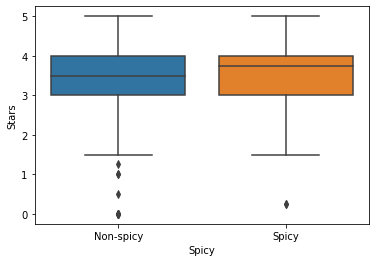

In [8]:
sns.boxplot(x='Spicy', y="Stars", data=us_stars)

In [9]:
#show how many ramens have over 4 stars
us_high_rated_spicy = stars[((stars["Spicy"] == "Spicy") & (stars["Stars"] >= 4)& (stars["Country"] == "USA"))]
us_high_rated_non_spicy = stars[((stars["Spicy"] == "Non-spicy") & (stars["Stars"] >= 4) & (stars["Country"] == "USA"))]

In [10]:
print("High rated spicy ramen ratio:", (len(us_high_rated_spicy)/len(us_spicy_ramens)*100), "%")
print("High rated non-spicy ramen ratio:", (len(us_high_rated_non_spicy)/len(us_non_spicy_ramens)*100), "%")

High rated spicy ramen ratio: 44.285714285714285 %
High rated non-spicy ramen ratio: 33.85826771653544 %


In [11]:
us_high_rated_spicy[(us_high_rated_spicy["Stars"] == 5)]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Spicy
39,2541,Nissin,Cup Noodles Very Veggie Spicy Chicken Flavor R...,Cup,USA,5.0,NaN,Spicy
482,2098,Nongshim,Kimchi Flavor Noodle Soup,Cup,USA,5.0,NaN,Spicy
902,1678,Nongshim,Shin Black Spicy Po-Au-Feu Flavor (Mew Edition),Pack,USA,5.0,NaN,Spicy
1095,1485,Nongshim,Spicy Tonkotsu Noodle Soup,Pack,USA,5.0,NaN,Spicy
1402,1178,Nongshim,Shin Black Spicy Pot-au-feu Flavor Premium Noo...,Cup,USA,5.0,NaN,Spicy
1646,934,Nongshim,Jinjja Jinjja Flamin' Hot & Nutty,Pack,USA,5.0,2013 #4,Spicy


In [12]:
### spicy ramen of Nissin Japan

nissin_spicy_ramens = stars[((stars["Spicy"] == "Spicy") & (stars["Brand"] == "Nissin" )& (stars["Country"] == "Japan" ))]
nissin_non_spicy_ramens = stars[((stars["Spicy"] == "Non-spicy") & (stars["Brand"] == "Nissin" )& (stars["Country"] == "Japan" ))]

Text(0.5, 1.0, 'Non Spicy Ramens Stars')

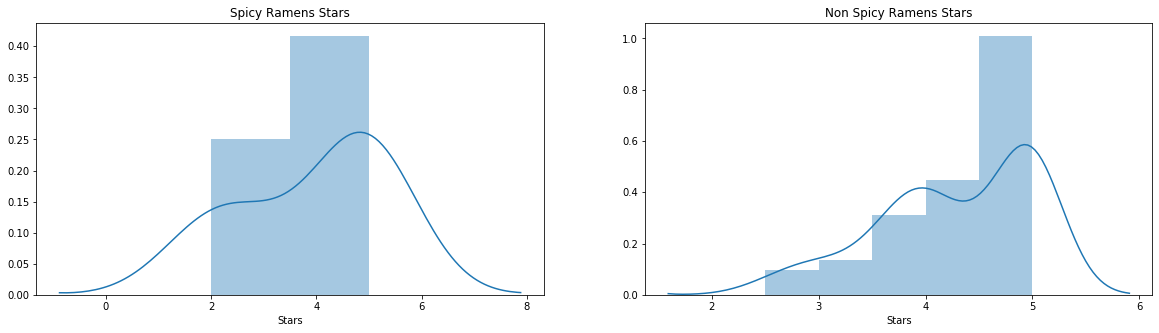

In [13]:
f, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.distplot(nissin_spicy_ramens["Stars"], ax=ax[0]).set_title("Spicy Ramens Stars")
sns.distplot(nissin_non_spicy_ramens["Stars"], ax=ax[1]).set_title("Non Spicy Ramens Stars")

In [14]:
japanese_nissin_stars = stars[(stars["Country"] == "Japan") & (stars["Brand"] == "Nissin")]

japanese_nissin_stars.groupby(['Spicy'])["Stars"].describe()

,count,mean,std,min,25%,50%,75%,max
Spicy,,,,,,,,
Non-spicy,103.0,4.284951,0.721377,2.5,3.75,4.50,5.0,5.0
Spicy,8.0,3.937500,1.374188,2.0,2.75,4.75,5.0,5.0


In [15]:
#show how many ramens have over 4 stars
nissin_high_rated_spicy = stars[((stars["Spicy"] == "Spicy") & (stars["Stars"] >= 4)& (stars["Country"] == "Japan")& (stars["Brand"] == "Nissin"))]
nissin_high_rated_non_spicy = stars[((stars["Spicy"] == "Non-spicy") & (stars["Stars"] >= 4) & (stars["Country"] == "Japan") & (stars["Brand"] == "Nissin"))]

print("High rated spicy ramen ratio:", (len(nissin_high_rated_spicy)/len(nissin_spicy_ramens)*100), "%")
print("High rated non-spicy ramen ratio:", (len(nissin_high_rated_non_spicy)/len(nissin_non_spicy_ramens)*100), "%")

High rated spicy ramen ratio: 62.5 %
High rated non-spicy ramen ratio: 72.81553398058253 %


__Over view & Question__


Spicy flavors are more popular than non-spicy flavors in the US ramens. On the other hand, regarding ramens made by Nissin Japan, Non-spicy flavor is more popular than spicy flavor. 

Should Nissin Japan make spicy flavor when they want to sell new ramen in the US market?

### 2. The main component of this capstone is a research proposal. Using the data set you selected, propose and outline an experiment plan. The plan should consist of three key components:

####   2-1. Analysis that highlights your experimental hypothesis.

A Japanese ramen company, Nissin is planning to sell new ramen in the US market. They have data of that spicy flavor has better ratings in America, and non-spicy ramens have better grades for Nissin's ramens. Therefore, the R&D department of the company created two versions of ramens for conducting the A/B test. One is non-spicy traditional Japanese ramen; the other is US localized spicy ramen.

Nissin hypothesizes that they should create spicy flavor ramen as a new product because spicy ramens are more popular than non-spicy ramens in the US. They assumed other Japanese ramen companies failed to develop localized spicy ramens for the US market. Also, they care about the sample size of the data. 

#### 2-2. A rollout plan showing how you would implement and rollout the experiment

In this A/B testing, we will gather 400 samples from random US citizens. We will ask them to eat two types of ramens and review the ramen after the trial. To prevent them from being full for the second ramen, we will conduct this in 2 days. This is also good for participants to forget what ratings they gave for the first ramen. Also, all the tests will be held at lunchtime. Half of the group, 200 samples, will eat non-spicy ramen on the first day and eat spicy on the second day. The other group, also 200 samples, eats ramens in the opposite order. This 50:50 rollout intends to remove potential influence from the order. In addition to that, we will offer the participants to buy ramens after the trial. Often, people give better ratings in the trial. However, if they need to pay, people give us a more severe and realistic review of the products.

#### 2-3. An evaluation plan showing what constitutes success in this experiment

__Success Metric:__ The average ratings of each ramen will be our success metric. We will compare the ratings of each spicy and non-spicy ramens and select a better-rated flavor. We will compare with the previous ratings for Nissin's ramens. If the p-value is that anything less than .05, we reject the null hypothesis of no effect.

__Secondary Metric:__ As a secondary metric, we will check how many people will buy the ramens. If the p-value is that anything less than .05, we reject the null hypothesis of no effect.

__Future plan:__ After checking the popular flavor with the first success metric, we will try to improve the buying rate of the secondary metric by improving the ramen.